<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных." data-toc-modified-id="Изменение-типов-данных.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение типов данных.</a></span></li></ul></li><li><span><a href="#Расчет-для-каждого-пользователя:" data-toc-modified-id="Расчет-для-каждого-пользователя:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчет для каждого пользователя:</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Убираем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Убираем-редкие-и-выбивающиеся-значения.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Убираем редкие и выбивающиеся значения.</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы-исследования:" data-toc-modified-id="Выводы-исследования:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы исследования:</a></span></li></ul></div>

## Описание проекта
Компания «Мегалайн» — федерального оператора сотовой связи предлагает своим клиентам два тарифных плана: «Смарт» и «Ультра».

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов
Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import os

In [17]:
pth1 = '/datasets/calls.csv'
pth2 = '/Users/Alex/Desktop/practicum_ds/projects/mobile_data/calls.csv'

if os.path.exists(pth1):
    df_calls = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_calls = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [18]:
#df_calls = pd.read_csv('/datasets/calls.csv')

In [19]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [20]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [21]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [22]:
pth1 = '/datasets/internet.csv'
pth2 = '/Users/Alex/Desktop/practicum_ds/projects/mobile_data/internet.csv'

if os.path.exists(pth1):
    df_internet = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_internet = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [23]:
#df_internet = pd.read_csv('/datasets/internet.csv')

In [24]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [25]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [26]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [27]:
pth1 = '/datasets/messages.csv'
pth2 = '/Users/Alex/Desktop/practicum_ds/projects/mobile_data/messages.csv'

if os.path.exists(pth1):
    df_messages = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_messages = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [28]:
#df_messages = pd.read_csv('/datasets/messages.csv')

In [29]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [30]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [31]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [32]:
pth1 = '/datasets/tariffs.csv'
pth2 = '/Users/Alex/Desktop/practicum_ds/projects/mobile_data/tariffs.csv'

if os.path.exists(pth1):
    df_tariffs = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_tariffs = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [33]:
#df_tariffs = pd.read_csv('/datasets/tarrifs.csv')

In [34]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [35]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [36]:
pth1 = '/datasets/users.csv'
pth2 = '/Users/Alex/Desktop/practicum_ds/projects/mobile_data/users.csv'

if os.path.exists(pth1):
    df_users = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_users = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [37]:
#df_users = pd.read_csv('/datasets/users.csv')

In [38]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [39]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [40]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

### Вывод

Описание данных:

Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


1. Предварительно можно утверждать, что, данных достаточно для решения задачи.
2. Пропусков в данных нет, за исключением churn_date.
3. В первом приближении артефакты (аномалии)* не обнаружены (значения, которые не отражают действительность и появились по какой-то ошибке).
4. Количественные данные представлены в формате int or float.
5. Данные даты и времени представлены в формате object.
6. Соблюдение требований к стилю в названии колонок:
- Строчные буквы.
- Отсутствие пробелов.
- Использован «змеиный_регистр» (snake_case)

## Предобработка данных

In [41]:
# переименование столбцов
df_calls = df_calls.rename(columns={'id':'calls_id'})
df_messages = df_messages.rename(columns={'id':'messages_id'})
df_internet = df_internet.rename(columns={'id':'internet_ses_id'})
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

**Округление в большую сторону согласно тарифов компании.**

In [98]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')

**Проверка на дубликаты.**

In [43]:
# подсчёт явных дубликатов
display(df_calls.duplicated().sum())
display(df_internet.duplicated().sum())
display(df_messages.duplicated().sum())
display(df_users.duplicated().sum())

0

0

0

0

### Изменение типов данных.

In [44]:
# Замена типа object в столбцах с дата-временными данными
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

Замена типа object в столбцах с дата-временными данными, чтобы появилась возможность проводить анализ.

## Расчет для каждого пользователя:

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

In [45]:
# посчитано и добавлено в таблицу месяц
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

In [46]:
df_calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
df_calls_pivot.columns = ['user_id', 'month', 'calls_count', 'minutes_used']
df_calls_pivot

,user_id,month,calls_count,minutes_used
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


**количество отправленных сообщений по месяцам**

In [47]:
df_messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='messages_id', aggfunc='count').reset_index()
df_messages_pivot.columns = ['user_id', 'month', 'messages_used']
df_messages_pivot

,user_id,month,messages_used
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


**объем израсходованного интернет-трафика по месяцам**

In [48]:
# округление до гегабайта по итогам месяца согласно тарифного плана
def gb_used(mb_used):  
    if mb_used%1024 > 0:
        return (mb_used - mb_used%1024 + 1024) / 1024
    else:
        return mb_used / 1024

In [49]:
df_internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_pivot['gb_used'] = df_internet_pivot['mb_used'].apply(gb_used)
df_internet_pivot

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0
...,...,...,...,...
3198,1498,10,20579.36,21.0
3199,1499,9,1845.75,2.0
3200,1499,10,17788.51,18.0
3201,1499,11,17963.31,18.0


In [50]:
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included']/1024

**помесячной выручки с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).**

In [51]:
df = pd.merge(df_internet_pivot, df_calls_pivot, how = 'outer', left_on=['user_id','month'], right_on = ['user_id','month'])
df = df.merge(df_messages_pivot, how = 'outer', left_on=['user_id','month'], right_on = ['user_id','month'])
df = df.merge(df_users, how = 'outer', on='user_id')
df = df.merge(df_tariffs, how = 'outer', on='tariff')
display(df.head())

,user_id,month,mb_used,gb_used,calls_count,minutes_used,messages_used,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5.0,2253.49,3.0,22.0,159.0,22.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,6.0,23233.77,23.0,43.0,172.0,60.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,7.0,14003.64,14.0,47.0,340.0,75.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,8.0,14055.93,14.0,52.0,408.0,81.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,9.0,14568.91,15.0,58.0,466.0,57.0,52,NaN,Краснодар,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30.0


In [52]:
df.isna().sum() # подсчёт пропусков

user_id                     0
month                       2
mb_used                    13
gb_used                    13
calls_count                42
minutes_used               42
messages_used             499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
gb_per_month_included       0
dtype: int64

**Заполнение пропусков**

In [53]:
# перебор названий столбцов в цикле и замена пропущенных значений на 0
columns_to_replace = ['mb_used', 'gb_used', 'calls_count', 'minutes_used', 'messages_used']

for column in columns_to_replace:
    df[column] = df[column].fillna(0)

In [54]:
df[df['month'].isna()]

,user_id,month,mb_used,gb_used,calls_count,minutes_used,messages_used,age,churn_date,city,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
985,1128,NaN,0.0,0.0,0.0,0.0,0.0,51,2018-12-23,Волжский,...,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,30.0
3215,1371,NaN,0.0,0.0,0.0,0.0,0.0,50,2018-12-30,Омск,...,2018-12-25,smart,50,15360,500,550,200,3,3,15.0


In [55]:
# удаление строк с пропусками в столбце month
df = df.dropna(subset=['month'])

In [56]:
# расчет перерасхода согласно тарифного плана
def over_used(tariff, included, used):
    if tariff == 'smart':
        if used - included > 0:
            return used - included
        else:
            return 0
    elif tariff == 'ultra':
        if used - included > 0:
            return used - included
        else:
            return 0

            
df['minutes_over_used'] = df.apply(lambda x: over_used(x['tariff'], x['minutes_included'], x['minutes_used']), axis=1)
df['messages_over_used'] = df.apply(lambda x: over_used(x['tariff'], x['messages_included'], x['messages_used']), axis=1)
df['gb_over_used'] = df.apply(lambda x: over_used(x['tariff'], x['gb_per_month_included'], x['gb_used']), axis=1)

In [57]:
# расчет помесячной выручки с каждого пользователя 
df['income'] = df['minutes_over_used'] * df['rub_per_minute'] + df['messages_over_used'] * df['rub_per_message'] + df['gb_over_used'] * df['rub_per_gb'] + df['rub_monthly_fee']

In [86]:
df.head()

,user_id,month,mb_used,gb_used,calls_count,minutes_used,messages_used,age,churn_date,city,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_over_used,messages_over_used,gb_over_used,income
0,1000,5.0,2253.49,3.0,22.0,159.0,22.0,52,NaN,Краснодар,...,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
1,1000,6.0,23233.77,23.0,43.0,172.0,60.0,52,NaN,Краснодар,...,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
2,1000,7.0,14003.64,14.0,47.0,340.0,75.0,52,NaN,Краснодар,...,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
3,1000,8.0,14055.93,14.0,52.0,408.0,81.0,52,NaN,Краснодар,...,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0
4,1000,9.0,14568.91,15.0,58.0,466.0,57.0,52,NaN,Краснодар,...,3000,1950,150,1,1,30.0,0.0,0.0,0.0,1950.0


## Исследовательский анализ данных

In [58]:
# формула расчета усов

def mustache(param):
    q3 = param.describe()[6]
    q1 = param.describe()[4]
    iqr = q3 - q1
    right_mustache_border = min(q3 + 1.5*iqr, param.describe()[7]).round()
    left_mustache_border = max(q1 - 1.5*iqr, param.describe()[3]).round()
    return left_mustache_border, right_mustache_border

**Tariff ultra**

In [59]:
# сравнение парамметров describe
df.query('tariff == "ultra"')[['minutes_used', 'minutes_included', 'messages_used', 'messages_included', 'gb_used', 'gb_per_month_included']].describe().round(2)

,minutes_used,minutes_included,messages_used,messages_included,gb_used,gb_per_month_included
count,985.00,985.0,985.00,985.0,985.00,985.0
mean,526.62,3000.0,49.36,1000.0,19.49,30.0
std,317.61,0.0,47.80,0.0,9.85,0.0
min,0.00,3000.0,0.00,1000.0,0.00,30.0
25%,284.00,3000.0,6.00,1000.0,12.00,30.0
50%,518.00,3000.0,38.00,1000.0,19.00,30.0
75%,752.00,3000.0,79.00,1000.0,27.00,30.0
max,1673.00,3000.0,224.00,1000.0,49.00,30.0


In [60]:
# дисперсия
np.var(df.query('tariff == "ultra"')[['minutes_used', 'messages_used', 'gb_used']])

minutes_used     100771.223617
messages_used      2282.946075
gb_used              96.993116
dtype: float64

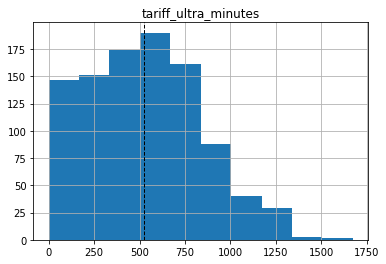

In [61]:
# гисторграмма minutes_used
df.query('tariff == "ultra"')['minutes_used'].hist().set_title('tariff_ultra_minutes');
plt.axvline(x=df.query('tariff == "ultra"')['minutes_used'].mean(), color='k', linestyle='dashed', linewidth=1);

In [62]:
# посчитаем значение усов
ultra_mus_minutes = mustache(df.query('tariff == "ultra"')['minutes_used'])
ultra_mus_minutes

(0.0, 1454.0)

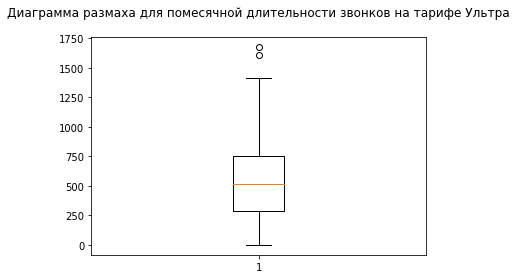

In [63]:
plt.boxplot(df.query('tariff == "ultra"')['minutes_used']);
plt.title('Диаграмма размаха для помесячной длительности звонков на тарифе Ультра\n')
plt.show()

In [64]:
df.query('tariff == "ultra"')['minutes_used'].quantile([0.25,0.5,0.75])

0.25    284.0
0.50    518.0
0.75    752.0
Name: minutes_used, dtype: float64

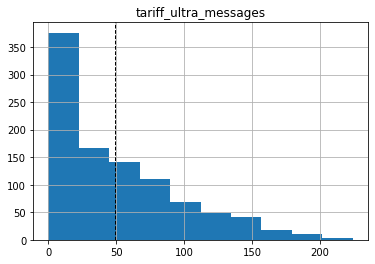

In [65]:
# гисторграмма messages_used
df.query('tariff == "ultra"')['messages_used'].hist().set_title('tariff_ultra_messages');
plt.axvline(x=df.query('tariff == "ultra"')['messages_used'].mean(), color='k', linestyle='dashed', linewidth=1);

In [66]:
# посчитаем значение усов
ultra_mus_messages = mustache(df.query('tariff == "ultra"')['messages_used'])
ultra_mus_messages

(0.0, 188.0)

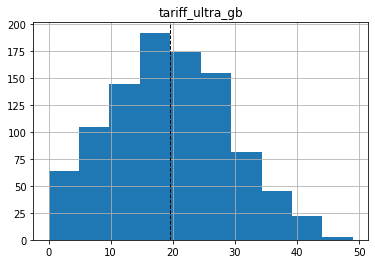

In [67]:
# гисторграмма gb_used
df.query('tariff == "ultra"')['gb_used'].hist().set_title('tariff_ultra_gb');
plt.axvline(x=df.query('tariff == "ultra"')['gb_used'].mean(), color='k', linestyle='dashed', linewidth=1);

In [68]:
# посчитаем значение усов
ultra_mus_internet = mustache(df.query('tariff == "ultra"')['gb_used'])
ultra_mus_internet

(0.0, 49.0)

Пользователям тарифа ultra в среднем требуется:
1. 526 минут разговора
2. 50 сообщений
3. 20 гб интернет трафика

В тарифе ultra ни один пользователь не превысил лимит по минутам и сообщениям.

**Tariff smart**

In [69]:
df.query('tariff == "smart"')[['minutes_used', 'minutes_included', 'messages_used', 'messages_included', 'gb_used', 'gb_per_month_included']].describe().round(2)

,minutes_used,minutes_included,messages_used,messages_included,gb_used,gb_per_month_included
count,2229.00,2229.0,2229.00,2229.0,2229.00,2229.0
mean,417.93,500.0,33.38,50.0,16.33,15.0
std,190.31,0.0,28.23,0.0,5.75,0.0
min,0.00,500.0,0.00,50.0,0.00,15.0
25%,282.00,500.0,10.00,50.0,13.00,15.0
50%,422.00,500.0,28.00,50.0,17.00,15.0
75%,545.00,500.0,51.00,50.0,20.00,15.0
max,1435.00,500.0,143.00,50.0,38.00,15.0


In [70]:
# дисперсия
np.var(df.query('tariff == "smart"')[['minutes_used', 'messages_used', 'gb_used']])

minutes_used     36203.066652
messages_used      796.455483
gb_used             33.013887
dtype: float64

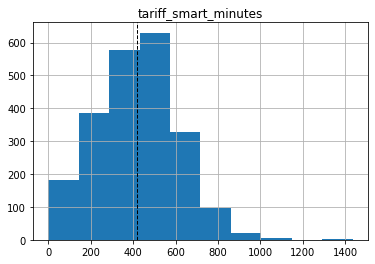

In [71]:
# гисторграмма minutes_used
df.query('tariff == "smart"')['minutes_used'].hist().set_title('tariff_smart_minutes');
plt.axvline(x=df.query('tariff == "smart"')['minutes_used'].mean(), color='k', linestyle='dashed', linewidth=1);

In [72]:
# посчитаем значение усов
smart_mus_minutes = mustache(df.query('tariff == "smart"')['minutes_used'])
smart_mus_minutes

(0.0, 940.0)

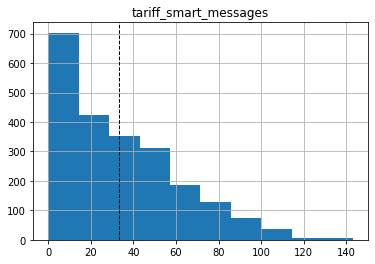

In [73]:
# гисторграмма messages_used
df.query('tariff == "smart"')['messages_used'].hist().set_title('tariff_smart_messages');
plt.axvline(x=df.query('tariff == "smart"')['messages_used'].mean(), color='k', linestyle='dashed', linewidth=1);

In [74]:
# посчитаем значение усов
smart_mus_messages = mustache(df.query('tariff == "smart"')['messages_used'])
smart_mus_messages

(0.0, 112.0)

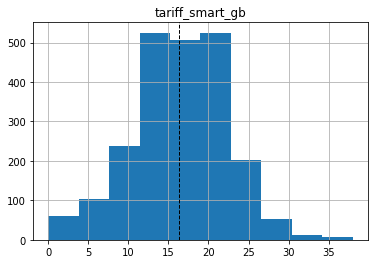

In [75]:
# гисторграмма gb_used
df.query('tariff == "smart"')['gb_used'].hist().set_title('tariff_smart_gb');
plt.axvline(x=df.query('tariff == "smart"')['gb_used'].mean(), color='k', linestyle='dashed', linewidth=1);

In [76]:
# посчитаем значение усов
smart_mus_internet = mustache(df.query('tariff == "smart"')['gb_used'])
smart_mus_internet

(2.0, 30.0)

Пользователям тарифа smart в среднем требуется:
1. 417 минут разговора
2. 34 сообщений
3. 17 гб интернет трафика

In [77]:
# сравнительная таблица тарифов по параметрам из метода describe
ultra_minutes = df.query('tariff == "ultra"')['minutes_used'].describe()
ultra_messages = df.query('tariff == "ultra"')['messages_used'].describe()
ultra_internet = df.query('tariff == "ultra"')['gb_used'].describe()

smart_minutes = df.query('tariff == "smart"')['minutes_used'].describe()
smart_messages = df.query('tariff == "smart"')['messages_used'].describe()
smart_internet = df.query('tariff == "smart"')['gb_used'].describe()

dfs = [ultra_minutes, smart_minutes, ultra_messages, smart_messages, ultra_internet, smart_internet]

dfs_describe = pd.concat(dfs, axis=1)

dfs_describe.columns = ['ultra_minutes_used', 'smart_minutes_used', 'ultra_messages_used', 'smart_messages_used', 'ultra_gb_used', 'smart_gb_used'] # переименование столбцов

dfs_describe



,ultra_minutes_used,smart_minutes_used,ultra_messages_used,smart_messages_used,ultra_gb_used,smart_gb_used
count,985.000000,2229.000000,985.000000,2229.000000,985.000000,2229.000000
mean,526.623350,417.934948,49.363452,33.384029,19.494416,16.328847
std,317.606098,190.313730,47.804457,28.227876,9.853511,5.747061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,284.000000,282.000000,6.000000,10.000000,12.000000,13.000000
50%,518.000000,422.000000,38.000000,28.000000,19.000000,17.000000
75%,752.000000,545.000000,79.000000,51.000000,27.000000,20.000000
max,1673.000000,1435.000000,224.000000,143.000000,49.000000,38.000000


In [97]:
# сравнительная таблица тарифов по параметрам из метода describe
ultra_minutes = df.query('tariff == "ultra"')['minutes_used'].describe()
ultra_messages = df.query('tariff == "ultra"')['messages_used'].describe()
ultra_internet = df.query('tariff == "ultra"')['gb_used'].describe()
ultra_income = df.query('tariff == "ultra"')['income'].describe()

smart_minutes = df.query('tariff == "smart"')['minutes_used'].describe()
smart_messages = df.query('tariff == "smart"')['messages_used'].describe()
smart_internet = df.query('tariff == "smart"')['gb_used'].describe()
smart_income = df.query('tariff == "smart"')['income'].describe()

dfs = [ultra_minutes, smart_minutes, ultra_messages, smart_messages, ultra_internet, smart_internet, ultra_income, smart_income]

dfs_describe = pd.concat(dfs, axis=1)

dfs_describe.columns = ['ultra_minutes_used', 'smart_minutes_used', 'ultra_messages_used', 'smart_messages_used', 'ultra_gb_used', 'smart_gb_used', 'ultra_income', 'smart_income'] # переименование столбцов

dfs_describe



,ultra_minutes_used,smart_minutes_used,ultra_messages_used,smart_messages_used,ultra_gb_used,smart_gb_used,ultra_income,smart_income
count,975.000000,2170.000000,975.000000,2170.000000,975.000000,2170.000000,975.000000,2170.000000
mean,525.661538,416.368203,48.139487,32.993088,19.436923,16.296313,2067.692308,1256.124885
std,313.173874,182.636706,45.931015,27.242697,9.815959,5.389421,372.443107,744.334345
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1950.000000,550.000000
25%,286.000000,285.000000,6.000000,10.000000,12.000000,13.000000,1950.000000,550.000000
50%,518.000000,421.000000,38.000000,28.000000,19.000000,17.000000,1950.000000,1013.500000
75%,751.500000,543.000000,78.000000,50.750000,27.000000,20.000000,1950.000000,1750.000000
max,1410.000000,933.000000,188.000000,112.000000,49.000000,30.000000,4800.000000,4427.000000


**Сравнение суммарной выручки по тарифам.**

In [106]:
print('Суммарная выручка по тарифу Ультра =', df.query('tariff == "ultra"')['income'].sum())
print('Количество пользователей по тарифу Ультра =', len(df.query('tariff == "ultra"')['user_id'].unique()))
print('Суммарная выручка по тарифу Смарт =', df.query('tariff == "smart"')['income'].sum())
print('Количество пользователей по тарифу Смарт =', len(df.query('tariff == "smart"')['user_id'].unique()))

Суммарная выручка по тарифу Ультра = 2016000.0
Количество пользователей по тарифу Ультра = 148
Суммарная выручка по тарифу Смарт = 2725791.0
Количество пользователей по тарифу Смарт = 348


Суммарная выручк по тарифу Смарт выше т.к. пользователей в более чем в 2 раза больше.

### Убираем редкие и выбивающиеся значения. 

In [79]:
# tariff ultra
ultra_df_minutes = df.query('tariff == "ultra"')['minutes_used']
ultra_df_messages = df.query('tariff == "ultra"')['messages_used']
ultra_df_internet = df.query('tariff == "ultra"')['gb_used']


df.drop(df.query('tariff == "ultra"').loc[(ultra_df_minutes < ultra_mus_minutes[0]) | (ultra_df_minutes > ultra_mus_minutes[1])].index, inplace=True)
df.drop(df.query('tariff == "ultra"').loc[(ultra_df_messages < ultra_mus_messages[0]) | (ultra_df_messages > ultra_mus_messages[1])].index, inplace=True)
df.drop(df.query('tariff == "ultra"').loc[(ultra_df_internet < ultra_mus_internet[0]) | (ultra_df_internet > ultra_mus_internet[1])].index, inplace=True)

In [80]:
# tariff smart
smart_df_minutes = df.query('tariff == "smart"')['minutes_used']
smart_df_messages = df.query('tariff == "smart"')['messages_used']
smart_df_internet = df.query('tariff == "smart"')['gb_used']


df.drop(df.query('tariff == "smart"').loc[(smart_df_minutes < smart_mus_minutes[0]) | (smart_df_minutes > smart_mus_minutes[1])].index, inplace=True)
df.drop(df.query('tariff == "smart"').loc[(smart_df_messages < smart_mus_messages[0]) | (smart_df_messages > smart_mus_messages[1])].index, inplace=True)
df.drop(df.query('tariff == "smart"').loc[(smart_df_internet < smart_mus_internet[0]) | (smart_df_internet > smart_mus_internet[1])].index, inplace=True)

## Проверка гипотез

**Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

Гипотеза H₀:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются;

Гипотеза H₁. 
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

In [81]:
# «правило большого пальца» тут простое: если выборки разного размера и/или можно предположить, 
#что дисперсии у генеральных совокупностей разные — укажите equal_var = False при вызове 
#метода scipy.stats.ttest_ind()
print(len(df.query('tariff == "ultra"')))
print(len(df.query('tariff == "smart"')))
print(np.var(df.query('tariff == "ultra"')['income']))
print(np.var(df.query('tariff == "smart"')['income']))

975
2170
138571.59763313612
553778.3028369683


In [82]:
ultra = df.query('tariff == "ultra"')['income']
smart = df.query('tariff == "smart"')['income']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    ultra, 
    smart,
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  1.0457103851008165e-290
Отвергаем нулевую гипотезу


**Cредняя выручка пользователей тарифа «Ультра» больше тарифа «Смарт»**

Гипотеза H₀:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются;

Гипотеза H₁. 
- средняя выручка пользователей тарифа «Ультра» больше тарифа «Смарт»;

In [83]:
ultra = df.query('tariff == "ultra"')['income']
smart = df.query('tariff == "smart"')['income']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    ultra, 
    smart,
    equal_var = False)

print('p-значение: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (ultra.mean() > smart.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  5.228551925504082e-291
Отвергаем нулевую гипотезу


**Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

Гипотеза H₀:
- Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.;

Гипотеза H₁. 
- Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.;

In [84]:
# «правило большого пальца» тут простое: если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — укажите equal_var = False при вызове метода scipy.stats.ttest_ind()
print(len(df.query('city == "Москва"')))
print(len(df.query('city != "Москва"')))
print(np.var(df.query('city == "Москва"')['income']))
print(np.var(df.query('city != "Москва"')['income']))

606
2539
527352.9432217975
574904.6080309054


In [85]:
msk = df.query('city == "Москва"')['income']
not_msk = df.query('city != "Москва"')['income']

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    msk, 
    not_msk,
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.27591525304827774
Не получилось отвергнуть нулевую гипотезу


## Выводы исследования:

Пользователям тарифа ultra в среднем требуется:
1. 526 минут разговора
2. 50 сообщений
3. 20 гб интернет трафика

В тарифе ultra ни один пользователь не превысил лимит по минутам и сообщениям.

Пользователям тарифа smart в среднем требуется:
1. 417 минут разговора
2. 34 сообщений
3. 17 гб интернет трафика

По итогам проверки гипотез:

    1. Не получилось отвергнуть гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
    2. Не получилось отвергнуть гипотезу о том, что средняя выручка пользователей тарифа «Ультра» больше тарифа «Смарт».
    3. Отвергли гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    
Таким образом тариф Ультра вероятнее всего более предпочтителен, чем тариф Смарт.
    

Если судить с точки зрения валовой выручки то рариф Смарт приносит больше выручки т.к. у него более чем в 2 раза больше пользователей.

Думаю окончательный ответ о корректировке рекламного бюджета зависит от стоимости расходов на привлечение клиентов в тариф Ультра и Смарт.